# Guruprasad Velikadu Krishnamoorthy
# DSC530- Assignment Week 5

## Initial Setup

In [1]:
# Download basename and exists from OS module which will be used in the download function
from os.path import basename, exists

# Create a function named download_file, to dounload the scripts and files from Github to local path
def download_files(url):
    """
    Downloads the scripts/ files from Github to local directory
    takes url as input.
    """
    filename = basename(url)
    # Checking if the file exists in the local directory and it downloads the file if it doesn't exist already.
    if not exists(filename):
        from urllib.request import urlretrieve
        # Downloading the files to the local path
        local, _ = urlretrieve(url, filename)
        # Printing confirmation message
        print("Downloaded " + local)


In [2]:
#  Calling download functions to download .py files and data files used throughtout this assignment
download_files("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download_files("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download_files("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download_files("https://github.com/AllenDowney/ThinkStats2/raw/master/code/brfss.py")
download_files("https://github.com/AllenDowney/ThinkStats2/raw/master/code/CDBRFS08.ASC.gz")
download_files("https://github.com/AllenDowney/ThinkStats2/raw/master/code/hinc.py")
download_files("https://github.com/AllenDowney/ThinkStats2/raw/master/code/hinc06.csv")


Downloaded thinkstats2.py
Downloaded thinkplot.py
Downloaded nsfg.py
Downloaded brfss.py
Downloaded CDBRFS08.ASC.gz
Downloaded hinc.py
Downloaded hinc06.csv


In [3]:
# Importing the nsfg and other modules module from the author's code
import nsfg
import thinkstats2
import thinkplot

# importing the required libraries
import numpy as np
import sys
from collections import defaultdict
import math
import itertools
import pandas as pd
import scipy.stats as sci
import hinc



# Exercise 5.1

#### ***Question:*** In the BRFSS (see Section 5.4), the distribution of heights is roughly normal with parameters µ = 178 cm and σ = 7.7 cm for men, and µ = 163 cm and σ = 7.3 cm for women. In order to join Blue Man Group, you have to be male between 5’10” and 6’1” (see http://bluemancasting.com). What percentage of the U.S. male population is in this range? Hint: use scipy.stats.norm.cdf.

In [4]:
# Importing the brfss module that reads the file and creates a pandas dataFrame
import brfss
df_brfss = brfss.ReadBrfss()
# Printing top 5 rows of Dataframe
df_brfss.head()

,age,sex,wtyrago,finalwt,wtkg2,htm3
0,82.0,2,76.363636,185.870345,70.91,157.0
1,65.0,2,72.727273,126.603027,72.73,163.0
2,48.0,2,NaN,181.063210,NaN,165.0
3,61.0,1,73.636364,517.926275,73.64,170.0
4,26.0,1,88.636364,1252.624630,88.64,185.0


In [5]:
print(f" Number of records in brfss Dataframe is {len(df_brfss)}")
# Create Dataframes for mean and women based on values of sex variable
men_df_brfss=df_brfss[df_brfss.sex==1]
women_df_brfss=df_brfss[df_brfss.sex==2]

 Number of records in brfss Dataframe is 414509


In [6]:
# Drop na from the variable htm3 from men_df_brfss that represents heights
men_brfss_hgt=men_df_brfss.htm3.dropna()
# One way of calculating the mean and Variance in heights of men by using TrimmedMeanVar 
# function and setting the probablity of outliers to a very low value
mu_men, var_men = thinkstats2.TrimmedMeanVar(men_brfss_hgt, p=0.00001)
# Compute Standard Deviation by taking square root of Varaince
std_men=np.sqrt(var_men)
mu_men, std_men

(178.06660406074934, 7.7164321197127945)

In [7]:
# Alternate easier way of calculating mean and Standard Deviation of Men heights
men_brfss_hgt.mean(), men_brfss_hgt.std()

(178.06622109101272, 7.723563454782443)

In [8]:
# Drop na from the variable htm3 from women_df_brfss that represents heights
women_brfss_hgt=women_df_brfss.htm3.dropna()
# One way of calculating the mean and Variance in heights of women by using TrimmedMeanVar 
# function and setting the probablity of outliers to a very low value
mu_women, var_women = thinkstats2.TrimmedMeanVar(women_brfss_hgt, p=0.00001)
# Compute Standard Deviation by taking square root of Varaince
std_women=np.sqrt(var_women)
mu_women, std_women

(163.22376117902937, 7.261214456900203)

In [9]:
# Alternate easier way of calculating mean and Standard Deviation of Women heights
women_brfss_hgt.mean(), women_brfss_hgt.std()

(163.22347500412215, 7.269156286641344)

In [10]:
# Create a normal distribution for men using scify.stats.norm function
normal_distribution_men=sci.norm(loc=mu_men, scale=std_men)
normal_distribution_men

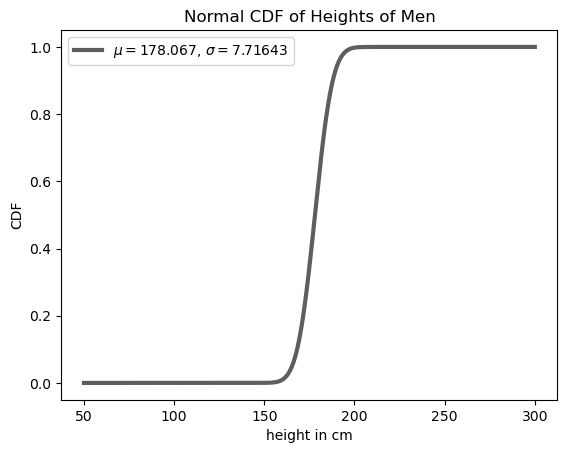

In [11]:
# Plotting the CDF plot for the Heights of Men
# Creating numpy array xs between the low and high limits for plotting
xs_men = np.linspace(50, 300,500)
# Creating ps array that represents normal cdf for each value of xs using scipy.stats.norm.cdf function
ps_men = sci.norm.cdf(xs_men, mu_men, std_men)
# Plotting the CDF plot using xs and ps using thinkplot
thinkplot.Plot(xs_men, ps_men, label = r"$\mu=%g$, $\sigma=%g$" % (mu_men, std_men), color="0.1")
thinkplot.Config(title="Normal CDF of Heights of Men", xlabel="height in cm", ylabel="CDF", loc="upper left")


#### How many men  are between 5'10" and 6'1"?



In [12]:
# To convert feet to centimeter, we do the below conversion
height_05_10_cm= ((5*12)+10)*2.54
height_06_01_cm= ((6*12)+1)*2.54
# Printing the heights in centimeter
height_05_10_cm,height_06_01_cm

(177.8, 185.42000000000002)

In [13]:
# Using the  cdf function to return the probablity of the distribution of the heights we are looking for

print(f"The Probability of Men that are 5 foot 10 inch tall or less is {normal_distribution_men.cdf(height_05_10_cm)}")
print(f"The Probability of Men that are 6 foot 1 inch tall or less is {normal_distribution_men.cdf(height_06_01_cm)}")
print(f"The Probability of Men that are between 6 foot 1 inch and 5 foot 10 inch tall is {normal_distribution_men.cdf(height_06_01_cm)-normal_distribution_men.cdf(height_05_10_cm)}")

The Probability of Men that are 5 foot 10 inch tall or less is 0.4862192171726642
The Probability of Men that are 6 foot 1 inch tall or less is 0.8296930182926712
The Probability of Men that are between 6 foot 1 inch and 5 foot 10 inch tall is 0.34347380112000697


In [14]:
# Calculating number of men by multiplying the probability with number of men
len(men_df_brfss) * normal_distribution_men.cdf(height_06_01_cm)-normal_distribution_men.cdf(height_05_10_cm)

129185.2058080066

#### ***Solution:***  34.34 % of US Men are eligible for Blue man casting which is approximately 129,185 men from our dataset.

# Exercise 5.2

#### ***Question:*** To get a feel for the Pareto distribution, let’s see how different the world would be if the distribution of human height were Pareto. With the parameters xm = 1 m and α = 1.7, we get a distribution with a reasonable minimum, 1 m, and median, 1.5 m. Plot this distribution. What is the mean human height in Pareto world? What fraction of the population is shorter than the mean? If there are 7 billion people in Pareto world, how many do we expect to be taller than 1 km? How tall do we expect the tallest person to be?

In [15]:
# Using scipy.stats.paerto function to create a Pareto distribution
alpha_height=1.7
# xmin is the minimum value from the sample for which we are creating the Paerto distribution
xmin_height=1
pareto_height = sci.pareto(b=alpha_height, scale=xmin_height)
# Calculating the median and validting if the median matches with the values provided in the question
pareto_height.median()

1.5034066538560549

#### What is the mean height in Pareto world?

In [16]:
# Using the mean function of the Pareto distribution
mean_pareto_height=pareto_height.mean()
mean_pareto_height

2.428571428571429

In [17]:
# Alternate way of getting the mean from Pareto Distribution
sci.pareto.stats(alpha_height, moments='m')

array(2.42857143)

#### What fraction of the population is shorter than the mean?

In [18]:
# To calculate this, we have to compute the CDF of distribution of mean that gives the probablity of distribution 
# at and lower than the mean.
pareto_height.cdf(mean_pareto_height)

0.778739697565288

In [19]:
# Alternate(manual) way of calculating the cdf of mean value in Pareto distribution using the formula of CDF for Perto
1 - (mean_pareto_height / xmin_height) ** -alpha_height

0.778739697565288

#### Out of 7 billion people, how many do we expect to be taller than 1 km? You could use dist.cdf or dist.sf.

In [20]:
# Manual calculation using formula of Complementary CDF. This is CCDF which is 1-CDF of 1KM of the distribution 
# As the height is measured in metres, converting 1KM to metres which is 1000m
((1000 / xmin_height) ** -alpha_height ) * 7000000000, (1- pareto_height.cdf(1000))  * 7000000000

(55602.97643069972, 55602.976430479954)

In [21]:
# Comparing the results from above using the survival function
pareto_height.sf(1000) * 7000000000

55602.97643069972

#### How tall do we expect the tallest person to be?
#### ***Solution:*** To answer this question we use a different approach pf calculating the probability of a person being tall in the 7 billion people. Then use a function that gives the value of the distribution for that probablity. We use ppf which is Probability Point function which returns the normal distribution value for the given probability. 


In [22]:
# Creating the ppf function variable
ppf_pareto=pareto_height.ppf
# Probablity of a person being tall in he group of 7 billion people is 1 in 7 billion
prob=1/7000000000
# To calculate the ppf , we need to know what is the cdf of the tallest person which can be calculated as below:
prob_tallest=1-prob
prob, prob_tallest

(1.4285714285714285e-10, 0.9999999998571428)

In [23]:
# Calculating the ppf for the prob_tallest
ppf_pareto(1-(1/7000000000))


618349.6106759505

#### ***Solution:*** The tallest person is expected to be 618349.6 metres or 618.3 Kilometres in the Pareto world.

In [24]:
# Calculating the ppf for the shortest person just to verify the results which comes to 1m as specified in the question
# This proves our analysis is correct
ppf_pareto((1/7000000000))

1.0000000000840337

# Exercise 6.1

#### ***Question:*** The distribution of income is famously skewed to the right. In this exercise, we’ll measure how strong that skew is. The Current Population Survey (CPS) is a joint effort of the Bureau of Labor Statistics and the Census Bureau to study income and related variables. Data collected in 2013 is available from http://www.census.gov/hhes/www/cpstables/032013/hhinc/toc.htm. I downloaded hinc06.xls, which is an Excel spreadsheet with information about household income, and converted it to hinc06.csv, a CSV file you will find in the repository for this book. You will also find hinc2.py, which reads this file and transforms the data. The dataset is in the form of a series of income ranges and the number of respondents who fell in each range. The lowest range includes respondents who reported annual household income “Under  5000.”Thehighestrangeincludesrespondentswhomade“ 250,000 or more.” To estimate mean and other statistics from these data, we have to make some assumptions about the lower and upper bounds, and how the values are distributed in each range. hinc2.py provides InterpolateSample, which shows one way to model this data. It takes a DataFrame with a column, income, that contains the upper bound of each range, and freq, which contains the number of respondents in each frame. It also takes log_upper, which is an assumed upper bound on the highest range, expressed in log10 dollars. The default value, log_upper=6.0 represents the assumption that the largest income among the respondents is  106 , or one million dollars. InterpolateSample generates a pseudo-sample; that is, a sample of household incomes that yields the same number of respondents in each range as the actual data. It assumes that incomes in each range are equally spaced on a log10 scale.

In [25]:
# Importing the module hinc that reads the file hinc06.csv
import hinc
""" Reading the file contents as a Dataframe. While reading the file, many transformations and cleaning are
done such as reading only first 2 columns Income and frequency, removing commas from values. Only the upper range 
of the income is included.New fields for cumulative sum and cdf(ps) are added. 
"""
household_income_df = hinc.ReadData()
household_income_df.head()

,income,freq,cumsum,ps
0,4999.0,4204,4204,0.034330
1,9999.0,4729,8933,0.072947
2,14999.0,6982,15915,0.129963
3,19999.0,7157,23072,0.188407
4,24999.0,7131,30203,0.246640


In [26]:
""" 
Creating a new function log10_Income to calclate the log10 values of income. 
This is done as the logNormal distribution are found to be more normally distributed.
"""
def log10_Income(df_income, log_upper=6.0, log_lower=3.0):
    """Assumption: log10 income is uniform in each range.
    df_income: DataFrame with columns income, freq,cumsum, ps
    log_upper: log10 of the assumed upper bound for the highest range.
    log_lower: log10 of the assumed lower bound for the lowest range.
    returns: NumPy array of log10 household income
    """
    # Adding a new column log_upper that computes log10 of the income
    df_income['log_upper'] = np.log10(df_income.income)
    # Adding new column log_lower. Shift method is used to take lower bound of log_upper from previous row.
    # For example, if value x is log_upper in Row #2, x will become log_lower in Row #3 and so on..
    df_income['log_lower'] = df_income.log_upper.shift(1)
    # Defaulting the log_lower of first row with log_lower value being passed to the function. 
    # Default is 3.0 which means assumption is lower range of income is $1000
    df_income.loc[0, 'log_lower'] = log_lower
    # Defaulting the log_upper of first row with log_upper value being passed to the function. 
    # Default is 6.0 which means assumption is lower range of income is $1,000,000
    df_income.loc[41, 'log_upper'] = log_upper
    # creating an empty list to collect the results
    final_arrays = []    # Iterating through each row in the df_income and creating sample values for each range.
    for _, row in df_income.iterrows():
        # linspace function is used to create sample values in the range of log_lower and log_upper for each range
        vals = np.linspace(row.log_lower, row.log_upper, int(row.freq))
        # collecting each array results in the final_arrays list
        final_arrays.append(vals)
    # this command will combine all individual array created for each row item into a single array.
    log10_sample = np.concatenate(final_arrays)
    # returning the final log10 sample values
    return log10_sample

In [27]:
# Creating first log10 sample of Income with assumption that lower cap of income is $1000 
# and higher cap is $1,000,000 using log10_Income function
log_sample1 = log10_Income(household_income_df, log_upper=6.0, log_lower=3.0)

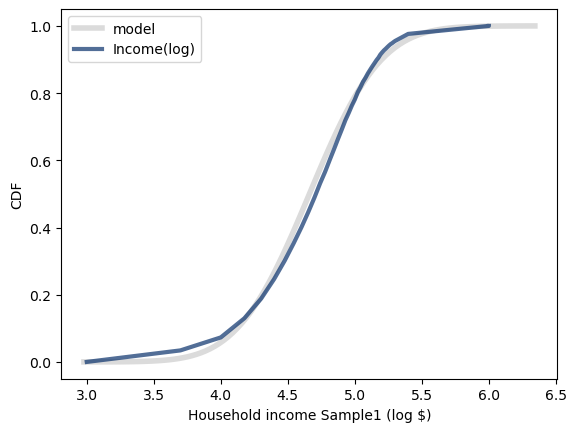

In [28]:
# Plotting CDF plot for the log10 of sample values created for sample1
log_cdf1 = thinkstats2.Cdf(log_sample1, label="Income(log)")
# Computing mean, variance and Std.Deviation of sample 1
mean_sample1, var_sample1 = thinkstats2.TrimmedMeanVar(log_sample1)
std_sample1 = np.sqrt(var_sample1)
# To plot the log normal plot, compute the min and max on x scale
xmin_sample1 = mean_sample1 - 4 * std_sample1
xmax_sample1 = mean_sample1 + 4 * std_sample1
# Use RenderNormalCdf to create CDF of Normal Distribution
xs_sample1, ps_sample1 = thinkstats2.RenderNormalCdf(mean_sample1, std_sample1, xmin_sample1, xmax_sample1)
# Plotting the log10 income and model in the graph
thinkplot.Plot(xs_sample1, ps_sample1, label="model", linewidth=4, color="0.8")
thinkplot.Cdf(log_cdf1)
thinkplot.Config(
    xlabel="Household income Sample1 (log $)",
    ylabel="CDF",
    loc="upper left",
)

# The results indicate that the sample1 is not a good Normal distribution 
# as the they deviate from the model

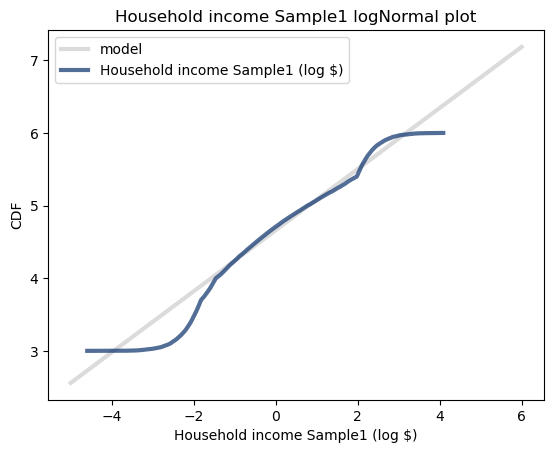

In [29]:
# Creating Normal Probablity plot(Q-Q plot)
xs1_sample1 = [-5, 6]
# Fitting line for Normal distribution using the mean and std values computed above
xs1_sample1, ys1_sample1 = thinkstats2.FitLine(xs1_sample1, mean_sample1, std_sample1)
thinkplot.Plot(xs1_sample1, ys1_sample1, color="0.8", label="model")
# Creating the Normal Probablity plot for log sample1
xs1_sample1, ys1_sample1 = thinkstats2.NormalProbability(log_sample1)
thinkplot.Plot(xs1_sample1, ys1_sample1, label="Household income Sample1 (log $)")
thinkplot.Config(
    title="Household income Sample1 logNormal plot",
    xlabel="Household income Sample1 (log $)",
    ylabel="CDF",
    loc="upper left",
)

# Results indicate that the sample1 deviate from Normal plot and so it is not a good Normal distribution.

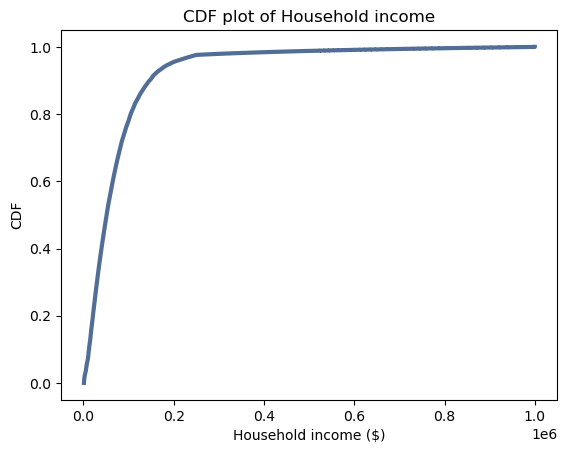

In [30]:
# Creating the sample values from log_sample1 by raisind the values to power 10
sample1 = np.power(10, log_sample1)
# Creating CDF distribution on sample1 
cdf1 = thinkstats2.Cdf(sample1)
thinkplot.Cdf(cdf1)
thinkplot.Config(xlabel='Household income ($)',
               ylabel='CDF', title="CDF plot of Household income")


In [31]:
# The Results from the plot indicates that most of the values are under 250000 and after which the slope of the curve is almost straight which indicates outlers
cdf1.Values(0.2),cdf1.Values(0.6),cdf1.Values(0.8), cdf1.Values(0.9),cdf1.Values(0.95),cdf1.Values(0.975)

(20907.20628409106,
 64797.41434541705,
 104465.44759682736,
 146342.43357389743,
 191689.76226639017,
 246736.37641106677)

***Question:*** Compute the median, mean, skewness and Pearson’s skewness of the resulting sample. What fraction of households report a taxable income below the mean? How do the results depend on the assumed upper bound?

In [32]:
# Defining the functions for moments and skewness
def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)
# Mean is calculated from Raw Moment when the value of k is 1. Other Raw moments are not very helpful
def Mean(xs):
    return RawMoment(xs, 1)
def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    return sum((x - mean)**k for x in xs) / len(xs)
# Calculating the Variance from Central Moments when k=2. Other Central moments are not very helpful
def Var(xs):
    return CentralMoment(xs, 2)
def StandardizedMoment(xs, k):
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    return CentralMoment(xs, k) / std**k
# Skewness is the thirs Standardized moment. Other standardized moments are not very helpful
def Skewness(xs):
    return StandardizedMoment(xs, 3)
# Function to calculate the Meidan when the CDF value is 0.5
def Median(xs):
    cdf = thinkstats2.Cdf(xs)
    return cdf.Value(0.5)
# Function to calculate the Pearson Median Skewness based on the differences between Mean and Median
def PearsonMedianSkewness(xs):
    median = Median(xs)
    mean = RawMoment(xs, 1)
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    gp = 3 * (mean - median) / std
    return gp

#### Calculating Mean, Median and Skewness of sample1

In [33]:
# Results indicate Mean is greater than Median which indicates Right skew and the distribution has a long tail on the right
Mean(sample1), Median(sample1)

(74278.70753118733, 51226.45447894046)

In [34]:
""" The results of Sample Skewness and Pearson Median skewness are positive which indicates 
    Positive skew and confirms our observation from above. The sample skewness is susceptible to Outliers.
    Hence the value of sample skewness and Perason's Skewness are widely different.
"""
Skewness(sample1), PearsonMedianSkewness(sample1)

(4.949920244429583, 0.7361258019141782)

#### What fraction of households report a taxable income below the mean?

In [35]:
"""
Results indicate that 66 % of household has taxable income below the mean value of the distribution.
As the Mean deviates from median in either direction,it indicates the presence of outliers. The More the deviation, more skewed the
distribution is. In this case, the model is not normal and indicates the wealth is not evenly distributed in the economy. 
50% of people make less than or equal to $51226, and rest 50% comprises of people that make upto a million.
"""
cdf1.Prob(Mean(sample1)),cdf1.Prob(Median(sample1))

(0.660005879566872, 0.5)

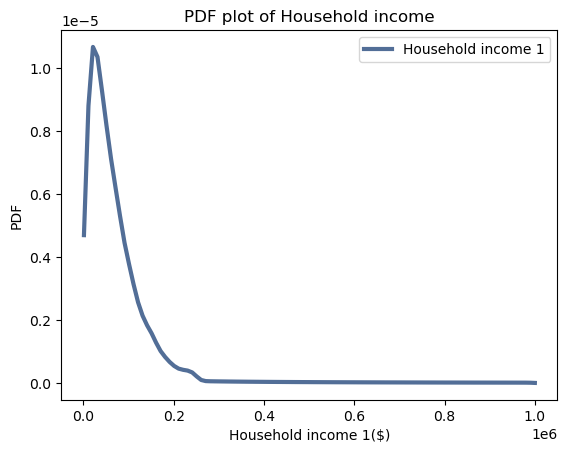

In [36]:
# plotting the Probability density function shows a long tail on the right indicating right skew.
pdf1=thinkstats2.EstimatedPdf(sample1)
thinkplot.Pdf(pdf1,label="Household income 1")
thinkplot.Config(xlabel='Household income 1($)',
               ylabel='PDF', title="PDF plot of Household income",
                  loc="upper right",)

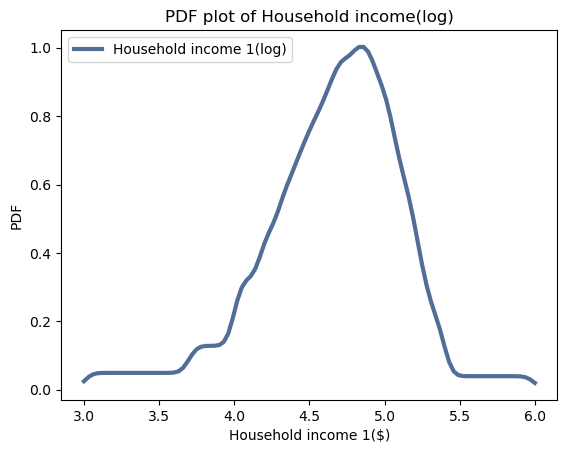

In [37]:
# plotting the Probability density function of Log sample1 shows it is not normally distributed.
pdf1=thinkstats2.EstimatedPdf(log_sample1)
thinkplot.Pdf(pdf1,label="Household income 1(log)")
thinkplot.Config(xlabel='Household income 1($)',
               ylabel='PDF', title="PDF plot of Household income(log)",
                  loc="upper left",)

#### How do the results depend on the assumed upper bound?

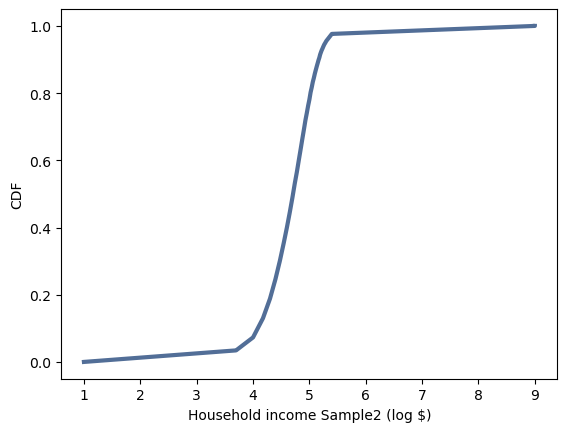

In [38]:
# In the sample 2 we will assume the lowest income is $10 and highest income is 1 billion.
log_sample2 = log10_Income(household_income_df, log_upper=9.0, log_lower=1.0)
# Creating CDF plot for sample 2 and computing log10 values of income
log_cdf2 = thinkstats2.Cdf(log_sample2)
thinkplot.Cdf(log_cdf2)
thinkplot.Config(xlabel='Household income (log $)',
               ylabel='CDF')
thinkplot.Config(
    xlabel="Household income Sample2 (log $)",
    ylabel="CDF",
    loc="upper left",
)
# Creating the sample values from log_sample1 by raisind the values to power 10
sample2 = np.power(10, log_sample2)
cdf2 = thinkstats2.Cdf(sample2)

In [39]:
"""
The results indicate that the mean has increased to 2,929,824 while Median still stays the same as Median is not susceptible for outliers.
The Sample Skewness and Pearson Median Skewness are still positive which indicates Positive skew.
The CDF for meann is 0.98 which indicates that 98 % of people make income that is lesser than mean.
It indicates the model is a very bad representation of tje economy and is not even close to being normal.
The model has a very long tail on the right. This increasing the Upper bound increases the outliers and hence 
impacts the  Mean and Sample skewness both of which are suspectible to outlers. 
Increasing the outlers does not impact Median at all, Pearson's Median skewness is slightly impacted but not all that much
"""
Mean(sample2), Median(sample2),Skewness(sample2), PearsonMedianSkewness(sample2),cdf2.Prob(Mean(sample2))

(2929824.1711969436,
 51226.45447894046,
 17.539709536779085,
 0.22852278968690012,
 0.9832840647405641)

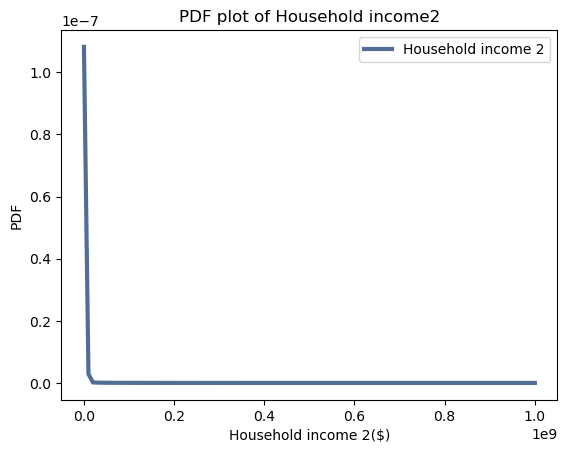

In [40]:
# PLotting the pdf of sample2 indicates a very long tail on the right and the bell curve of normal distribution is not even visible in the plot
pdf2=thinkstats2.EstimatedPdf(sample2)
thinkplot.Pdf(pdf2,label="Household income 2")
thinkplot.Config(xlabel='Household income 2($)',
               ylabel='PDF', title="PDF plot of Household income2",
                  loc="upper right")

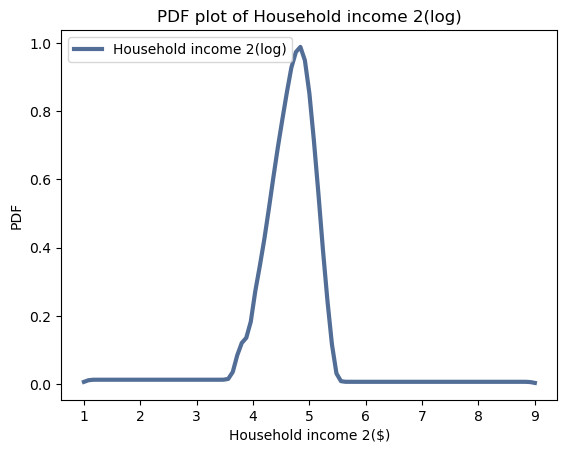

In [41]:
# plotting the Probability density function of Log sample2 shows it is not normally distributed.
pdf2=thinkstats2.EstimatedPdf(log_sample2)
thinkplot.Pdf(pdf2,label="Household income 2(log)")
thinkplot.Config(xlabel='Household income 2($)',
               ylabel='PDF', title="PDF plot of Household income 2(log)",
                  loc="upper left",)